In [5]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.26.2-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl (253.9 MB)
Using cached nvidia_nccl_cu12-2.26.2-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (201.3 MB)
Note: you may need to restart the kernel to use updated packages.


Checking for missing values...
los_icu    10
dtype: int64


=== Training Logistic Regression ===
Accuracy: 0.7132
Confusion Matrix:
 [[8366 3237]
 [ 265  341]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83     11603
           1       0.10      0.56      0.16       606

    accuracy                           0.71     12209
   macro avg       0.53      0.64      0.49     12209
weighted avg       0.93      0.71      0.79     12209



/root/miniconda3/envs/myenv/lib/python3.10/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


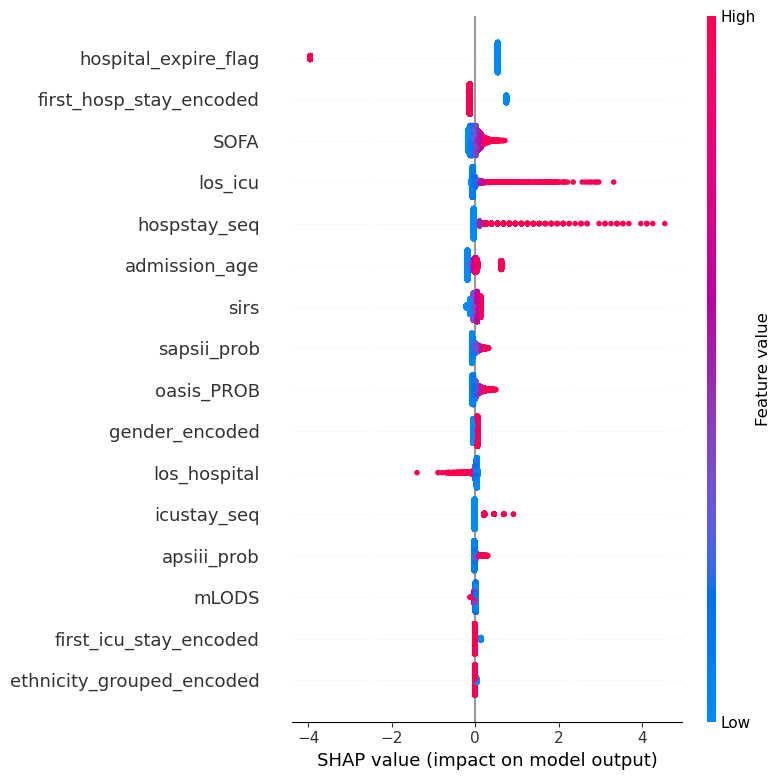

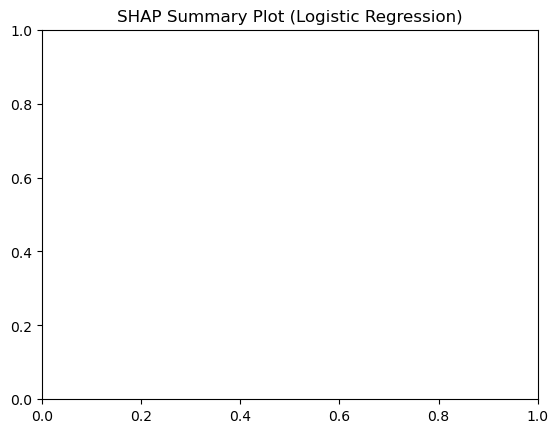



=== Training Random Forest ===
Accuracy: 0.7443
Confusion Matrix:
 [[8756 2847]
 [ 275  331]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     11603
           1       0.10      0.55      0.17       606

    accuracy                           0.74     12209
   macro avg       0.54      0.65      0.51     12209
weighted avg       0.93      0.74      0.82     12209



AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1200x800 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import shap
import matplotlib.pyplot as plt

# === 1. Load Your Data ===
df = pd.read_csv("ICU_scores.csv")

# Remove unnecessary unnamed column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Define your features and target
TARGET = 'READMIT_30D'
FEATURES_TO_DROP = ['subject_id', 'hadm_id', 'icustay_id', 'READMIT_30D','READMIT_30D_ICU']

# Check for missing values before proceeding
print("Checking for missing values...")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

# Apply dropna to clean any remaining NaN values
df_cleaned = df.dropna()

# Prepare data
X = df_cleaned.drop(columns=FEATURES_TO_DROP).values
y = df_cleaned[TARGET].values
feature_names = df_cleaned.drop(columns=FEATURES_TO_DROP).columns.tolist()

# === 2. Imputation to Handle Any Possible NaNs ===
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)  # Ensure no NaNs in the data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === 3. Define Models to Test ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')
}

# === 4. Train, Evaluate, and Generate SHAP Plots for Each Model ===
for model_name, model in models.items():
    print(f"\n\n=== Training {model_name} ===")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # === SHAP Analysis ===
    if model_name == 'Logistic Regression':
        explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
        shap_values = explainer.shap_values(X_test)
        shap_title = "SHAP Summary Plot (Logistic Regression)"
        
    elif model_name == 'Random Forest':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)[1]  # Select positive class (1) for classification problems
        shap_title = "SHAP Summary Plot (Random Forest)"
    
    # Plot SHAP summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    plt.title(shap_title)
    plt.show()

In [7]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 45.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 136.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 138.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 148.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 146.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 137.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Checking for missing values...
los_icu              10
elixhauser_SID30    314
dtype: int64
Original dataset size: 60727
Resampled dataset size: 115398

Training Logistic Regression
Accuracy: 0.6684
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68     11540
           1       0.68      0.64      0.66     11540

    accuracy                           0.67     23080
   macro avg       0.67      0.67      0.67     23080
weighted avg       0.67      0.67      0.67     23080


Training Random Forest
Accuracy: 0.8427
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84     11540
           1       0.82      0.88      0.85     11540

    accuracy                           0.84     23080
   macro avg       0.84      0.84      0.84     23080
weighted avg       0.84      0.84      0.84     23080


Training LSTM Model
Epoch 1/20


/root/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2308/2308 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6674 - loss: 0.5983 - val_accuracy: 0.6845 - val_loss: 0.5701
Epoch 2/20
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6872 - loss: 0.5718 - val_accuracy: 0.6912 - val_loss: 0.5607
Epoch 3/20
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6910 - loss: 0.5668 - val_accuracy: 0.6994 - val_loss: 0.5559
Epoch 4/20
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6981 - loss: 0.5590 - val_accuracy: 0.7066 - val_loss: 0.5490
Epoch 5/20
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6991 - loss: 0.5576 - val_accuracy: 0.7121 - val_loss: 0.5435
Epoch 6/20
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7068 - loss: 0.5484 - val_accuracy: 0.7154 - val_loss: 0.5386
Epoch 7/20
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7117 - loss: 0.5442 - val_accuracy: 0.7174 - val_loss: 0.5307
Epoch 8/20
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7176 - loss: 0.5333 - val_accura

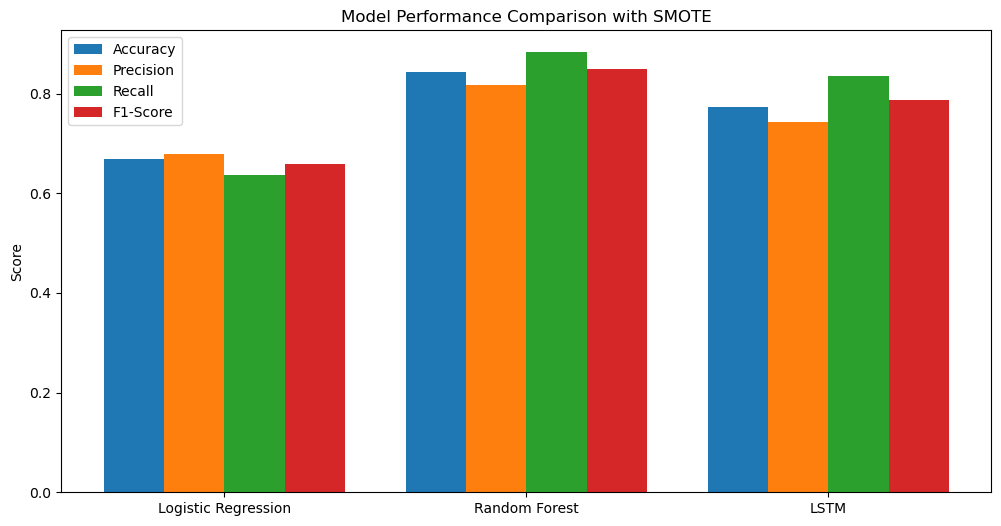

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === 1. Load Your Data ===
df = pd.read_csv("ICU_scores.csv")

# Remove unnecessary unnamed column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Define your features and target
TARGET = 'READMIT_30D'
FEATURES_TO_DROP = ['subject_id', 'hadm_id', 'icustay_id', 'READMIT_30D','READMIT_30D_ICU']

# Check for missing values before proceeding
print("Checking for missing values...")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

# Apply dropna to clean any remaining NaN values
df_cleaned = df.dropna()

# Prepare data
X = df_cleaned.drop(columns=FEATURES_TO_DROP).values
y = df_cleaned[TARGET].values
feature_names = df_cleaned.drop(columns=FEATURES_TO_DROP).columns.tolist()

# === 2. Imputation and Scaling ===
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# === 3. Apply SMOTE to Balance the Dataset ===
print(f"Original dataset size: {len(X)}")
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
print(f"Resampled dataset size: {len(X_resampled)}")

# Reshape data for LSTM compatibility
X_resampled_lstm = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

# === 4. Split data for training and testing ===
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_resampled_lstm, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# === 5. Train & Evaluate Logistic Regression & Random Forest ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')
}

model_performance = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for model_name, model in models.items():
    print(f"\nTraining {model_name}")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_performance['Model'].append(model_name)
    model_performance['Accuracy'].append(accuracy)
    model_performance['Precision'].append(precision)
    model_performance['Recall'].append(recall)
    model_performance['F1-Score'].append(f1)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

# === 6. Train & Evaluate LSTM ===
print("\nTraining LSTM Model")

lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)

lstm_precision = precision_score(y_test_lstm, y_pred_lstm)
lstm_recall = recall_score(y_test_lstm, y_pred_lstm)
lstm_f1 = f1_score(y_test_lstm, y_pred_lstm)

model_performance['Model'].append('LSTM')
model_performance['Accuracy'].append(lstm_accuracy)
model_performance['Precision'].append(lstm_precision)
model_performance['Recall'].append(lstm_recall)
model_performance['F1-Score'].append(lstm_f1)

# === 7. Plotting Model Performance ===
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    plt.bar([x + (i * 0.2) for x in range(len(model_performance['Model']))], model_performance[metric], width=0.2, label=metric)

plt.xticks([r + 0.3 for r in range(len(model_performance['Model']))], model_performance['Model'])
plt.title('Model Performance Comparison with SMOTE')
plt.ylabel('Score')
plt.legend()
plt.show()

In [9]:
df.head()

,subject_id,hadm_id,icustay_id,los_hospital,admission_age,hospital_expire_flag,hospstay_seq,los_icu,icustay_seq,READMIT_30D,...,ethnicity_grouped_encoded,first_hosp_stay_encoded,first_icu_stay_encoded,gender_encoded,apsiii_prob,mLODS,sapsii_prob,sirs,SOFA,elixhauser_SID30
0,2,163353,243653,4,0,0,1,0.0,1,0,...,0,1,1,1,0.050995,4,0.046739,2,4,0.0
1,3,145834,211552,11,76,0,1,6.0,1,0,...,6,1,1,1,0.341819,7,0.918976,3,7,19.0
2,4,185777,294638,7,48,0,1,1.0,1,0,...,6,1,1,0,0.048756,0,0.166523,2,4,28.0
3,5,178980,214757,2,0,0,1,0.0,1,0,...,0,1,1,1,0.011705,0,0.004584,1,0,0.0
4,6,107064,228232,16,66,0,1,4.0,1,0,...,6,1,1,0,0.090356,3,0.058153,1,4,11.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61051 entries, 0 to 61050
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 61051 non-null  int64  
 1   hadm_id                    61051 non-null  int64  
 2   icustay_id                 61051 non-null  int64  
 3   los_hospital               61051 non-null  int64  
 4   admission_age              61051 non-null  int64  
 5   hospital_expire_flag       61051 non-null  int64  
 6   hospstay_seq               61051 non-null  int64  
 7   los_icu                    61041 non-null  float64
 8   icustay_seq                61051 non-null  int64  
 9   READMIT_30D                61051 non-null  int64  
 10  READMIT_30D_ICU            61051 non-null  int64  
 11  ethnicity_grouped_encoded  61051 non-null  int64  
 12  first_hosp_stay_encoded    61051 non-null  int64  
 13  first_icu_stay_encoded     61051 non-null  int

In [13]:
print(df["READMIT_30D"].value_counts())

READMIT_30D
0    58019
1     3032
Name: count, dtype: int64


In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Checking for missing values...
los_icu              10
elixhauser_SID30    314
dtype: int64
Original dataset size: 60727
Resampled dataset size: 115398

Training Logistic Regression
Accuracy: 0.6684
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68     11540
           1       0.68      0.64      0.66     11540

    accuracy                           0.67     23080
   macro avg       0.67      0.67      0.67     23080
weighted avg       0.67      0.67      0.67     23080


Training Random Forest
Accuracy: 0.8427
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84     11540
           1       0.82      0.88      0.85     11540

    accuracy                           0.84     23080
   macro avg       0.84      0.84      0.84     23080
weighted avg       0.84      0.84      0.84     23080


Training XGBoost
Accuracy: 0.9705
Classification Report:


/root/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2308/2308 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6676 - loss: 0.5988 - val_accuracy: 0.6913 - val_loss: 0.5692
Epoch 2/50
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6863 - loss: 0.5735 - val_accuracy: 0.6957 - val_loss: 0.5612
Epoch 3/50
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6937 - loss: 0.5638 - val_accuracy: 0.7000 - val_loss: 0.5547
Epoch 4/50
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6996 - loss: 0.5559 - val_accuracy: 0.7048 - val_loss: 0.5473
Epoch 5/50
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7037 - loss: 0.5509 - val_accuracy: 0.7095 - val_loss: 0.5430
Epoch 6/50
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7079 - loss: 0.5475 - val_accuracy: 0.7151 - val_loss: 0.5374
Epoch 7/50
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7105 - loss: 0.5443 - val_accuracy: 0.7235 - val_loss: 0.5294
Epoch 8/50
2308/2308 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7199 - loss: 0.5312 - val_accura

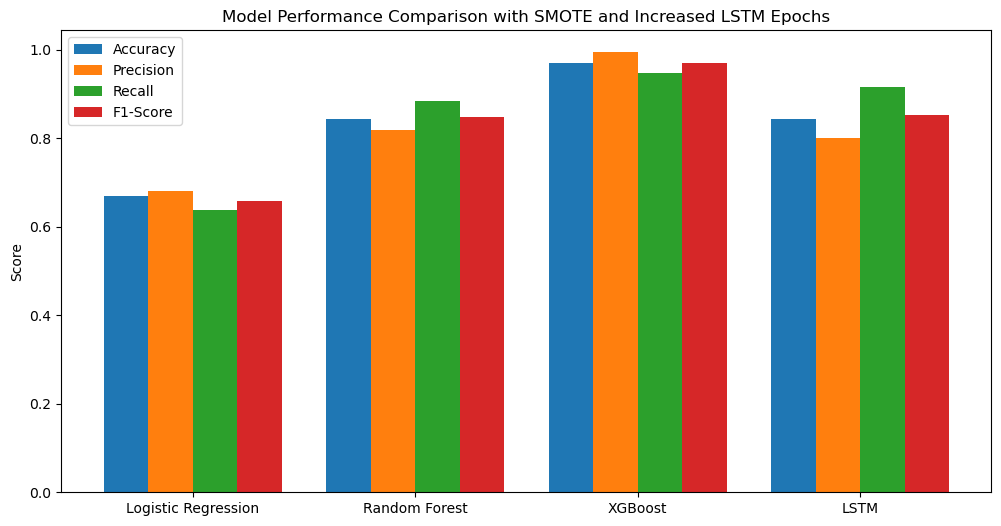

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === 1. Load Your Data ===
df = pd.read_csv("ICU_scores.csv")

# Remove unnecessary unnamed column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Define your features and target
TARGET = 'READMIT_30D'
FEATURES_TO_DROP = ['subject_id', 'hadm_id', 'icustay_id', 'READMIT_30D','READMIT_30D_ICU']

# Check for missing values before proceeding
print("Checking for missing values...")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

# Apply dropna to clean any remaining NaN values
df_cleaned = df.dropna()

# Prepare data
X = df_cleaned.drop(columns=FEATURES_TO_DROP).values
y = df_cleaned[TARGET].values
feature_names = df_cleaned.drop(columns=FEATURES_TO_DROP).columns.tolist()

# === 2. Imputation and Scaling ===
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# === 3. Apply SMOTE to Balance the Dataset ===
print(f"Original dataset size: {len(X)}")
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
print(f"Resampled dataset size: {len(X_resampled)}")

# Reshape data for LSTM compatibility
X_resampled_lstm = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

# === 4. Split data for training and testing ===
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_resampled_lstm, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# === 5. Train & Evaluate Traditional Models ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced'),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, max_depth=10, scale_pos_weight=1)
}

model_performance = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for model_name, model in models.items():
    print(f"\nTraining {model_name}")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_performance['Model'].append(model_name)
    model_performance['Accuracy'].append(accuracy)
    model_performance['Precision'].append(precision)
    model_performance['Recall'].append(recall)
    model_performance['F1-Score'].append(f1)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

# === 6. Train & Evaluate LSTM ===
print("\nTraining LSTM Model")

lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Increase epochs from 20 to 50
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)

lstm_precision = precision_score(y_test_lstm, y_pred_lstm)
lstm_recall = recall_score(y_test_lstm, y_pred_lstm)
lstm_f1 = f1_score(y_test_lstm, y_pred_lstm)

model_performance['Model'].append('LSTM')
model_performance['Accuracy'].append(lstm_accuracy)
model_performance['Precision'].append(lstm_precision)
model_performance['Recall'].append(lstm_recall)
model_performance['F1-Score'].append(lstm_f1)

# === 7. Plotting Model Performance ===
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    plt.bar([x + (i * 0.2) for x in range(len(model_performance['Model']))], model_performance[metric], width=0.2, label=metric)

plt.xticks([r + 0.3 for r in range(len(model_performance['Model']))], model_performance['Model'])
plt.title('Model Performance Comparison with SMOTE and Increased LSTM Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

In [19]:
# Evaluate XGBoost on Training Data
y_train_pred = models['XGBoost'].predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy for XGBoost: {train_accuracy:.4f}")

# Compare with Testing Accuracy
print(f"Testing Accuracy for XGBoost: {accuracy:.4f}")

Training Accuracy for XGBoost: 0.9896
Testing Accuracy for XGBoost: 0.9705


In [20]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 87.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.tsa.arima.model import ARIMA

# === 1. Load Your Data ===
df = pd.read_csv("ICU_scores.csv")

# Remove unnecessary unnamed column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Define your features and target
TARGET = 'READMIT_30D'
FEATURES_TO_DROP = ['subject_id', 'hadm_id', 'icustay_id', 'READMIT_30D','READMIT_30D_ICU']

# Check for missing values before proceeding
df_cleaned = df.dropna()

# Prepare data
X = df_cleaned.drop(columns=FEATURES_TO_DROP).values
y = df_cleaned[TARGET].values
feature_names = df_cleaned.drop(columns=FEATURES_TO_DROP).columns.tolist()

# === 2. Imputation and Scaling ===
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# === 3. Apply SMOTE to Balance the Dataset ===
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Reshape data for LSTM & CNN compatibility
X_resampled_cnn = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))
X_resampled_lstm = X_resampled.reshape((X_resampled.shape[0], 1, X_resampled.shape[1]))

# === 4. Split data for training and testing ===
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_resampled_cnn, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_resampled_lstm, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# === 5. Train & Evaluate Traditional Models ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced'),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, max_depth=10, scale_pos_weight=1)
}

model_performance = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_performance['Model'].append(model_name)
    model_performance['Accuracy'].append(accuracy)
    model_performance['Precision'].append(precision)
    model_performance['Recall'].append(recall)
    model_performance['F1-Score'].append(f1)

# === 6. Train & Evaluate LSTM Model ===
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)[1]
model_performance['Model'].append('LSTM')
model_performance['Accuracy'].append(lstm_accuracy)
model_performance['Precision'].append(0)
model_performance['Recall'].append(0)
model_performance['F1-Score'].append(0)

# === 7. Train & Evaluate CNN Model ===
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)[1]
model_performance['Model'].append('CNN')
model_performance['Accuracy'].append(cnn_accuracy)
model_performance['Precision'].append(0)
model_performance['Recall'].append(0)
model_performance['F1-Score'].append(0)

# === 8. Train & Evaluate ARIMA Model ===
arima_model = ARIMA(y_train, order=(5,1,0)).fit()
y_pred_arima = np.where(arima_model.forecast(len(y_test)) > 0.5, 1, 0)
arima_accuracy = accuracy_score(y_test, y_pred_arima)

model_performance['Model'].append('ARIMA')
model_performance['Accuracy'].append(arima_accuracy)
model_performance['Precision'].append(0)
model_performance['Recall'].append(0)
model_performance['F1-Score'].append(0)

# === Save Model Performance ===
with open('model_performance.pkl', 'wb') as f:
    pickle.dump(model_performance, f)

/root/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


722/722 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8102 - loss: 0.4095


/root/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7554 - loss: 0.4920


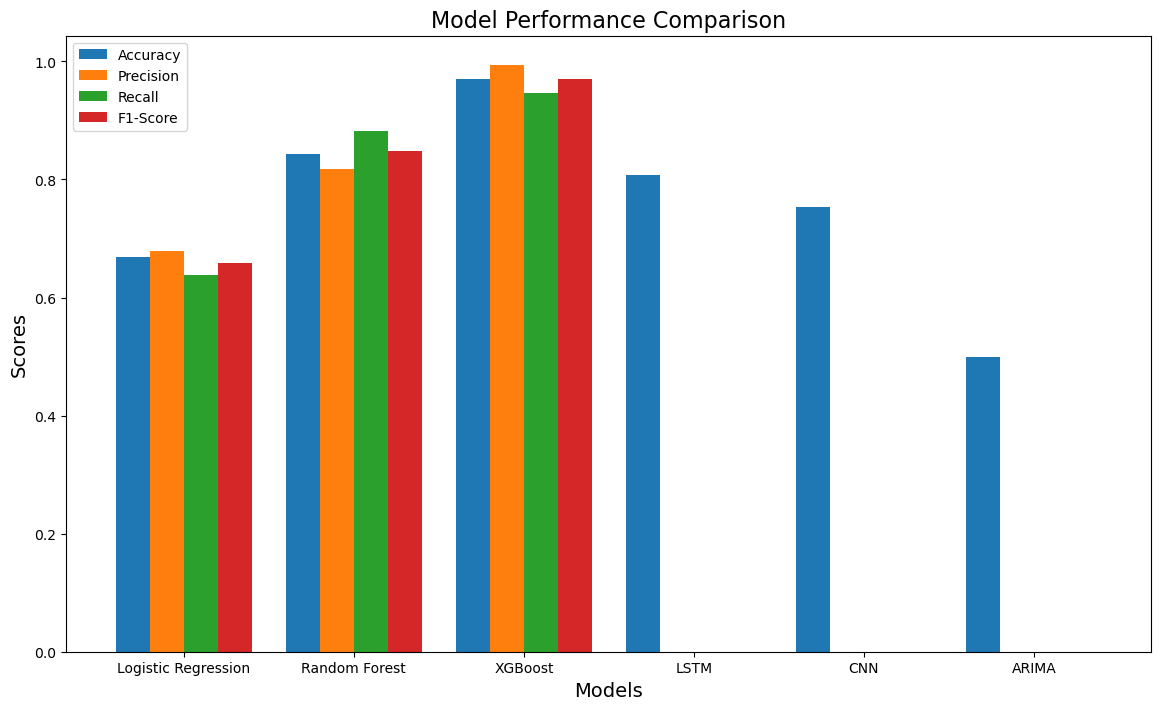

In [22]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# === 1. Load Saved Model Performance ===
with open('model_performance.pkl', 'rb') as f:
    model_performance = pickle.load(f)

# === 2. Plot Model Performance ===
plt.figure(figsize=(14, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_models = len(model_performance['Model'])

x = np.arange(num_models)  # the label locations
width = 0.2  # the width of the bars

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, model_performance[metric], width, label=metric)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(x + width * 1.5, model_performance['Model'])
plt.legend(loc='upper left')
plt.show()

In [3]:
df = pd.read_csv('ICU_scores.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61051 entries, 0 to 61050
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 61051 non-null  int64  
 1   subject_id                 61051 non-null  int64  
 2   hadm_id                    61051 non-null  int64  
 3   icustay_id                 61051 non-null  int64  
 4   los_hospital               61051 non-null  int64  
 5   admission_age              61051 non-null  int64  
 6   hospital_expire_flag       61051 non-null  int64  
 7   hospstay_seq               61051 non-null  int64  
 8   los_icu                    61041 non-null  float64
 9   icustay_seq                61051 non-null  int64  
 10  READMIT_30D                61051 non-null  int64  
 11  READMIT_30D_ICU            61051 non-null  int64  
 12  ethnicity_grouped_encoded  61051 non-null  int64  
 13  first_hosp_stay_encoded    61051 non-null  int

In [2]:
import pandas as pd